### Goal:
## To perform complete data analysis of the healthexp dataset.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


### data cleaning

In [28]:
print("Shape:", df.shape)
print(df.info())
print("columns")
print(df.columns.tolist())
print("Total missing values ")
print(df.isnull().sum())
print("Total duplicate rows:",df.duplicated().sum())
print(df.describe())

Shape: (274, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB
None
columns
['Year', 'Country', 'Spending_USD', 'Life_Expectancy']
Total missing values 
Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64
Total duplicate rows: 0
              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.57800

### Handling missing values

In [29]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric columns:", numeric_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())


Numeric columns: ['Year', 'Spending_USD', 'Life_Expectancy']
Categorical columns: ['Country']


### for numeric data we handle the missing values by considering the median,mean.
### for categorical data we handle the missing values by considering the mode.

In [30]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

C:\Users\SANJANA\AppData\Local\Temp\ipykernel_11116\2111359966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\SANJANA\AppData\Local\Temp\ipykernel_11116\2111359966.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### Analysis with NumPy & Pandas
 

In [31]:
# Mean of Life_Expectancy
life_mean = np.mean(df['Life_Expectancy'])
print("Mean Life Expectancy:", life_mean)

Mean Life Expectancy: 77.90948905109488


In [32]:
# Median of Spending_USD
spending_median = df['Spending_USD'].median()
print("Median Spending_USD:", spending_median)

Median Spending_USD: 2295.578


In [33]:
# Max of Year
year_max = df['Year'].max()
print("Maximum Year:", year_max)

Maximum Year: 2020


### Insights:
#### 1.Mean,median and mode operations are performed using numpy and pandas

## Visualization with matplotlib and seaborn

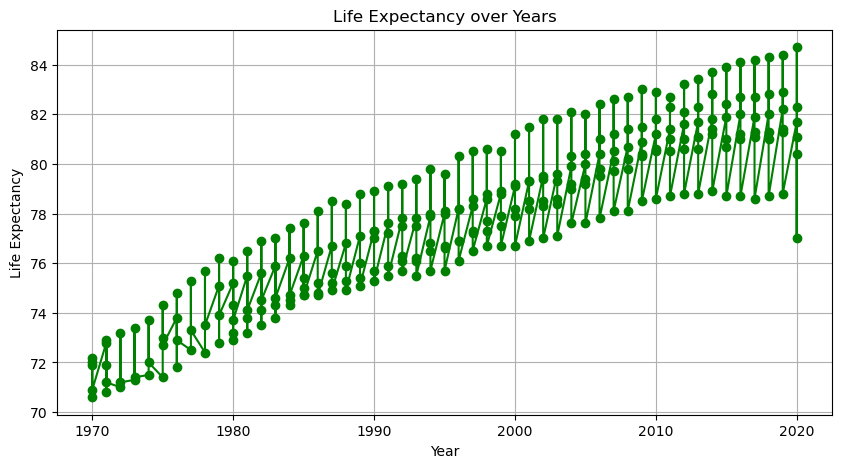

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Life_Expectancy'], marker='o', linestyle='-', color='green')
plt.title('Life Expectancy over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


### Insights
#### Inspect Life Expectancy Range Over Years
#### Life expectancy increases steadily over time across countries.
#### Early 1970s: ~70 years (average), gradual increase. 2000s: ~77–78 years (average).

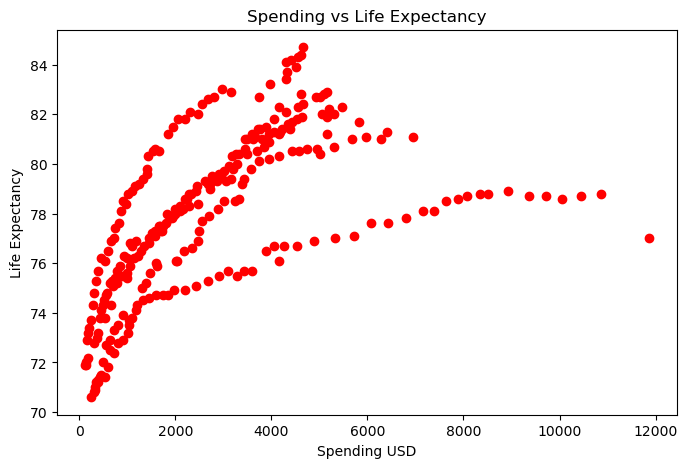

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(df['Spending_USD'], df['Life_Expectancy'], color='red')
plt.title('Spending vs Life Expectancy')
plt.xlabel('Spending USD')
plt.ylabel('Life Expectancy')
plt.show()


### Insights
#### Low spending (<$2000) → life expectancy varies 65–75 years.

#### Moderate spending ($2000–$5000) → life expectancy rises to 75–80 years.

#### High spending (>$5000) → life expectancy increases slightly, showing diminishing returns.

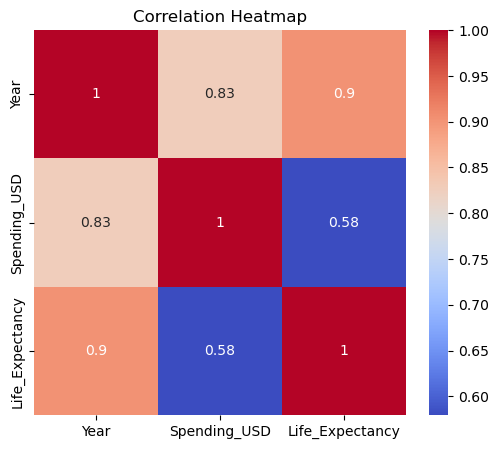

In [36]:
# Heatmap with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Insights
#### Life expectancy improves over years.
#### Both spending and life expectancy generally increase over time.

### Exploratory Data Analysis(EDA)

In [37]:
# Display column names with their data types
print(df.dtypes)

# Check number of duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Optional: Drop duplicates if any
df = df.drop_duplicates()


Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object
Number of duplicate rows: 0


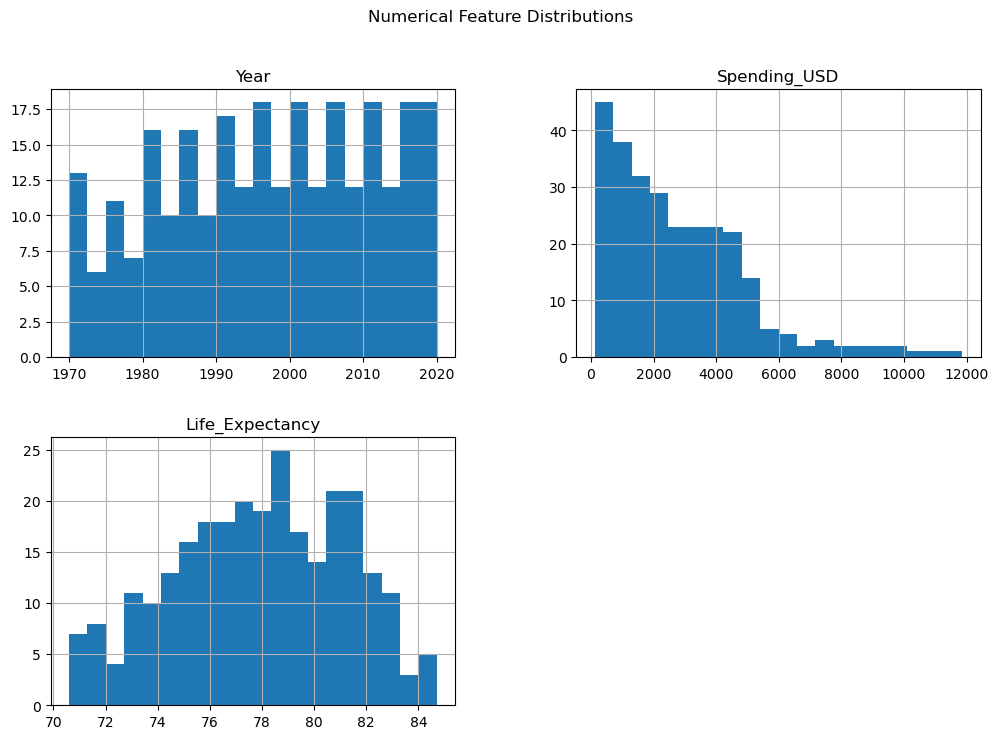

In [43]:
# univariate analysis
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()


### Insights
#### Health_Spending is skewed to the left, most countries spend a lot , few spend a little.

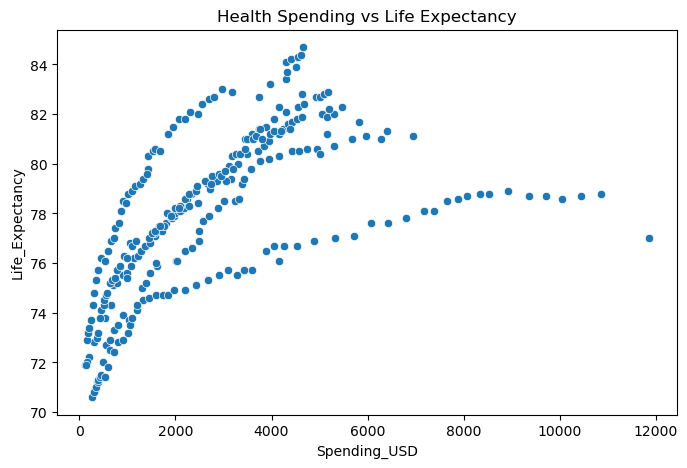

In [45]:
# Bivariate analysis (numerical vs numerical)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Spending_USD', y='Life_Expectancy', data=df)
plt.title('Health Spending vs Life Expectancy')
plt.show()


### Outlier Detection

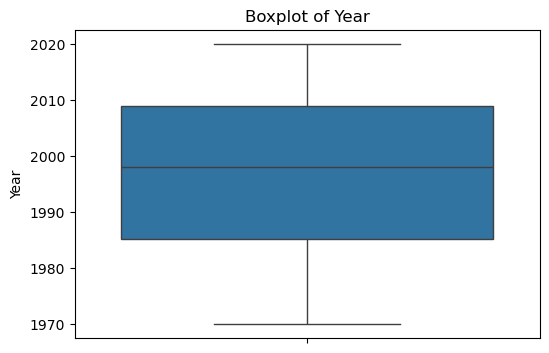

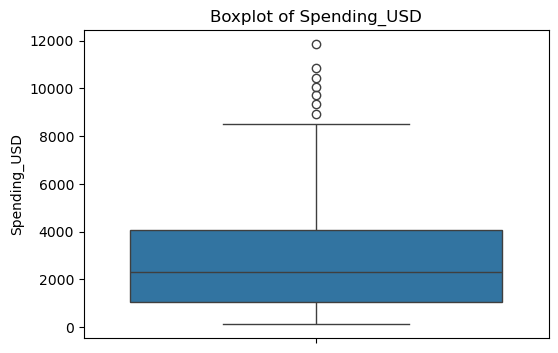

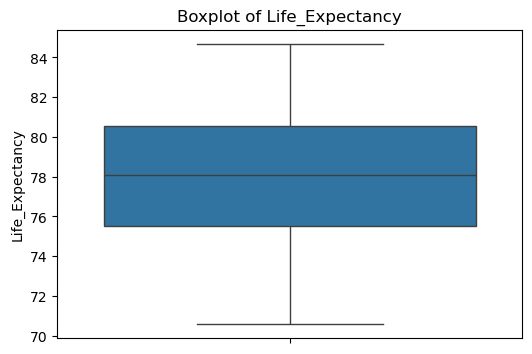

In [47]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Z Score Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()


,Year,Spending_USD,Life_Expectancy
0,-1.906933,-1.157968,-2.235127
1,-1.906933,-1.185430,-1.745872
2,-1.906933,-1.216536,-1.837607
3,-1.906933,-1.204466,-1.807029
4,-1.906933,-1.123896,-2.143391


### One-Hot Encoding

In [49]:
categorical_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()


,Year,Spending_USD,Life_Expectancy,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,-1.906933,-1.157968,-2.235127,False,True,False,False,False
1,-1.906933,-1.185430,-1.745872,True,False,False,False,False
2,-1.906933,-1.216536,-1.837607,False,False,True,False,False
3,-1.906933,-1.204466,-1.807029,False,False,False,True,False
4,-1.906933,-1.123896,-2.143391,False,False,False,False,True


### Optional Transformations (Log)

In [ ]:
for col in numeric_cols:
    if (df[col] > 0).all(): 
        df[col] = np.log1p(df[col])


In [52]:
df

,Year,Spending_USD,Life_Expectancy,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,-1.906933,-1.157968,-2.235127,False,True,False,False,False
1,-1.906933,-1.185430,-1.745872,True,False,False,False,False
2,-1.906933,-1.216536,-1.837607,False,False,True,False,False
3,-1.906933,-1.204466,-1.807029,False,False,False,True,False
4,-1.906933,-1.123896,-2.143391,False,False,False,False,True
...,...,...,...,...,...,...,...,...
269,1.625380,1.894010,0.975608,False,True,False,False,False
270,1.625380,1.222804,1.342549,True,False,False,False,False
271,1.625380,1.017541,0.761559,False,False,True,False,False
272,1.625380,0.856395,2.076431,False,False,False,True,False
